In [40]:
import numpy as np 
import matplotlib.pyplot as plt 
import autograd
import autograd.numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
plt.rcParams['figure.figsize'] = [12, 12]

### Question 1 ###

$\alpha$ représente le facteur de reproduction des proies

$\beta$ représente le facteur de mortalité des proies du fait des prédateurs (plus $\beta$ est élevé, plus la décroissance de $x_1$ sera élevée)

$\delta$ représente le facteur de reproduction des prédateurs du fait de la présence des proies

$\gamma$ représente le facteur de mortalité des proies

Le système différentielle se réécrit : 
$\dot{X} = f (X) $ avec $f : (x_1,x_2) \in (\mathbb{R^{*}_{+}})^2 \mapsto (x_1(\alpha - \beta x_2),-x2(\gamma - \delta x_1))$

Les points d'équilibre vérifie $f(x_1,x_2) = 0$:

Donc l'ensemble des points d'équilibre est $ EQ = \{(0,0),(\frac{\gamma}{\delta},\frac{\alpha}{\beta})\}$

Déterminons les valeurs propres du jacobien de $f$ en $\bar{x}$,
on a: $J_f(\bar{x}) = \begin{pmatrix} 0 & \frac{\delta \alpha}{\beta} \\ -\frac {\beta \gamma} {\delta} & 0 \end{pmatrix} $

Les valeurs propres ont donc des partie réelles nulles, on ne peut pas conclure sur la stabilité en $\bar{x}$

Déterminons les valeurs propres du jacobien de $f$ en $(0,0)$,
on a: $J_f(0,0) = \begin{pmatrix} \alpha & 0 \\ 0 & -\gamma\end{pmatrix}$ donc $\alpha>0$ est valeur propre donc $(0,0)$ est instable

### Question 2 ###

In [41]:


alpha = 0.2
beta=0.4
gamma=0.3
delta= 0.1

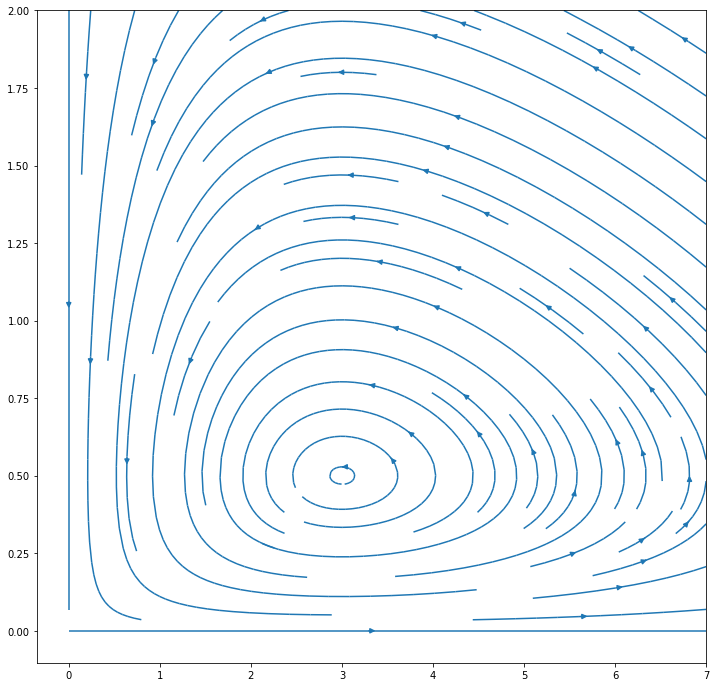

In [42]:
def f(X1, X2):
    return (X1*(alpha-beta*X2), -X2*(gamma-delta*X1))


x1 = np.linspace(0,7,10)
x2 = np.linspace(0,2,50)
X1,X2 = np.meshgrid(x1,x2)

plt.show()

plt.streamplot(X1,X2,f(X1,X2)[0],f(X1,X2)[1]);


D'après le champ de vecteurs ci-dessus, on peut voir que $(0,0)$ est un point d'équilibre instable tandis que l'autre point d'équilibre est bien stable, mais ne semble pas localement asymptotiquement stable.

### Question 3 ###



La fonction f est de classe $C^{1}$ donc d'après le théorème de Cauchy, il existe une unique solution maximale.

si $x_1(0) = 0 $, alors avec $x_1 : t \in \mathbb{R^{+}} \mapsto 0 $ et $x_2 : t \in \mathbb{R^{+}} \mapsto x_20\exp(-\gamma t) $

Alors $X(t) = \begin{pmatrix}  x_1(t) \\ x_2(t) \end{pmatrix}$ est la solution maximale associé à la condition initiale $(0,(0,x_{20}))$

de même si $x_{20} = 0$,

Si $x_{10} > 0$ et $x_{20} > 0$ : 

avec $X$ une solution maximale associée à $(0,(x_{10},x_{20})$, si il existe $t_0 >0$ tel que $x_1(t_0)=0$ alors on a :

$y_1 : t \in \mathbb{R^{+}} \mapsto 0 $ et $y_2 : t \in \mathbb{R^{+}} \mapsto x_2(t_0)\exp(-\gamma (t-t_0)) $ correspond aussi à une solution maximale (définie sur $\mathbb{R^{+}}$ au système de Cauchy avec les conditions $(t_0,(0,x_2(t_0))$ (tout comme $X$)

donc par unicité $x_1(0)=y_1(0)=x_{10}=0$ ce qui est absurde.

On raisonne de même si il existe $t_1 > 0 $ tel que $x_2(t_1) = 0$

donc si $x_{10} > 0$ et $x_{20} > 0$ alors la solution maximale associée $X$ est à valeurs dans $\mathbb{R_{>0}}\times \mathbb{R_{>0}} $ 

### Question 4 ###

En considérant $X$ solution:

On pose $V = H \ o\  X $

$V$ est bien dérivable car H est de classe $C^{1}$ sur son domaine de définition.

On se place dans le cas où $X$ est bien à valeurs dans $(\mathbb{R}_{+}^{*})^{2}$

$ V'(t) = \delta x_1(\alpha - \beta x_2) - \gamma(\alpha - \beta x_2)- \beta x_2 (\gamma - \delta x_1) + \alpha (\gamma - \delta x_1)  $

$V'(t) = (\alpha - \beta x_2)(\delta x_1 - \gamma) + (\gamma - \delta x_1)(\alpha - \beta x_2)$

$V'(t) = 0 $

Donc d'après l'étude sur $H$, $H$ est constante le long de la solution maximale $X$ associée à $(x_{10},x_{20}) \in (\mathbb{R^{*}_{+}})^2 $, donc d'après la forme de $H$, nécessairement $X$ est bornée. D'où, d'après le théorème sur le domaine d'existence de la solution maximale, $X$ est définie sur $\mathbb{R_{>0}}$   ($f$ est définie sur $\mathbb{R}^{2}$)

### Question 5 ###

In [43]:
def H(x1,x2) : 
    return delta*x1+ (-gamma)*np.log(x1) + beta*x2 - alpha * np.log(x2)

On pose:  $ V : (x_1,x_2) \in (\mathbb{R}_{+})^{2} \mapsto H(x_1,x_2) - H(\frac{\gamma}{\delta},\frac{\alpha}{\beta}) $
H admet un minimum en $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ (seul point où le gradient s'annule, et on sait que H admet au moins un minimum car H tend vers l'infini si $\|x\|$ tend vers l'infini ou si $x_1$ ou $x_2$ tendent vers 0

$V$ est bien continûment différentiable et f est continue.

De plus, $ \frac{\mathrm{d} }{\mathrm{d} t} V(X(t)) \leq 0 $

De plus, $V(x_1,x_2)\geq 0 $ et $V(x_1,x_2) = 0 \Leftrightarrow (x_1,x_2) = (\frac{\gamma}{\delta},\frac{\alpha}{\beta}) $ 

Donc le point d'équilibre $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ est stable d'après le théorème de Lyapunov.

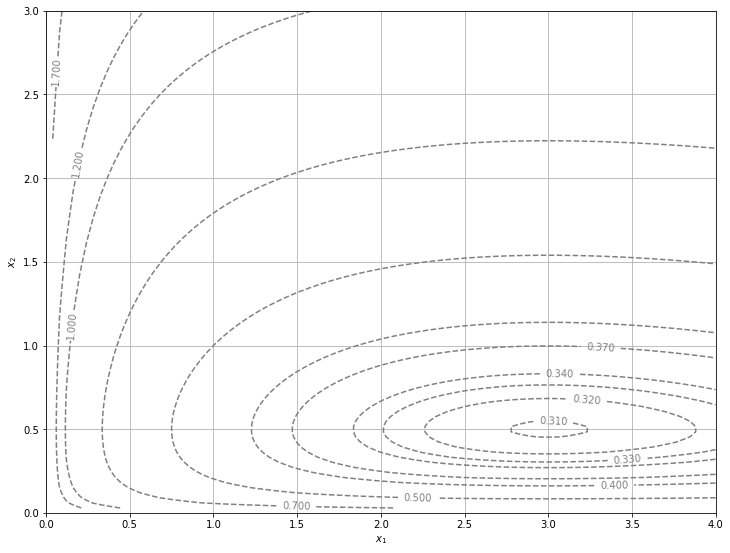

In [44]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

display_contour(H,
    x=np.linspace(0, 4.0, 100), 
    y=np.linspace(0.0, 3.0, 100), 
    levels= [0.31,0.32, 0.33,0.34,0.37,0.4,0.5,0.7,1,1.2,1.7] # 10 levels, automatically selected
)

Comme $H o X$ est constante, $X$ suit donc une courbe de niveau, cela confirme l'intuition grâce au champ de vecteurs, $X$ "tourne" autour du point d'équilibre $\bar{x}$ qui est donc stable. 

In [45]:
### Question 6 ###
alpha = 2
beta = 2
gamma = 2
delta = 2

def f(t, X):
    return np.array([X[0]*(alpha-beta*X[1]), -X[1]*(gamma-delta*X[0])])

def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0]
    x = [x0]
    ti = t0
    xi = x0
    while ti<tf:
        xi = xi + dt*f(ti,xi)
        ti = ti + dt
        x.append(xi)
        t.append(ti)
    return np.array(t),np.array(x)

def f_test(t,x):
    return -x

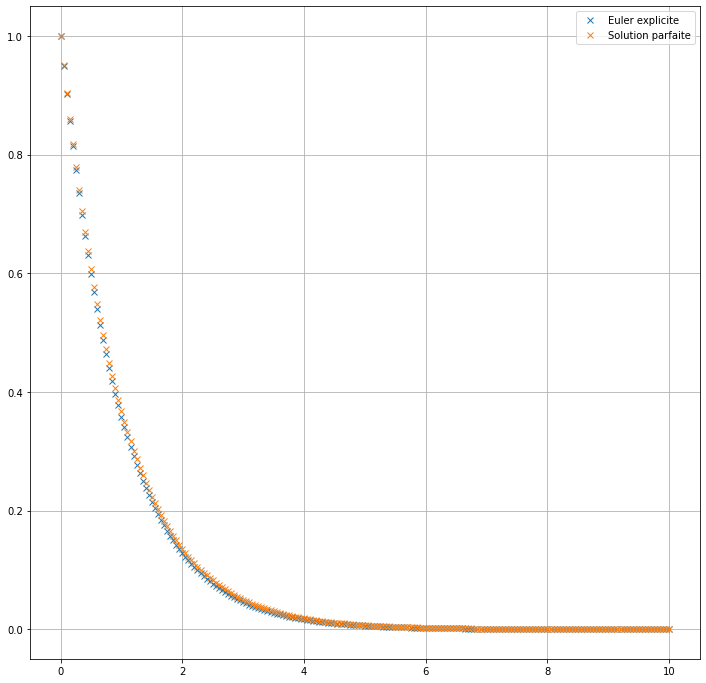

In [46]:
# Test d'Euler explicite sur une solution connue.
time, result = solve_euler_explicit(f_test, np.array([1.0]), 0.05, 0.0, 10.0)
plt.plot(time, result, 'x', label='Euler explicite')
plt.plot(time, np.exp(-time), 'x', label='Solution parfaite')
plt.legend()
plt.grid()
plt.show()

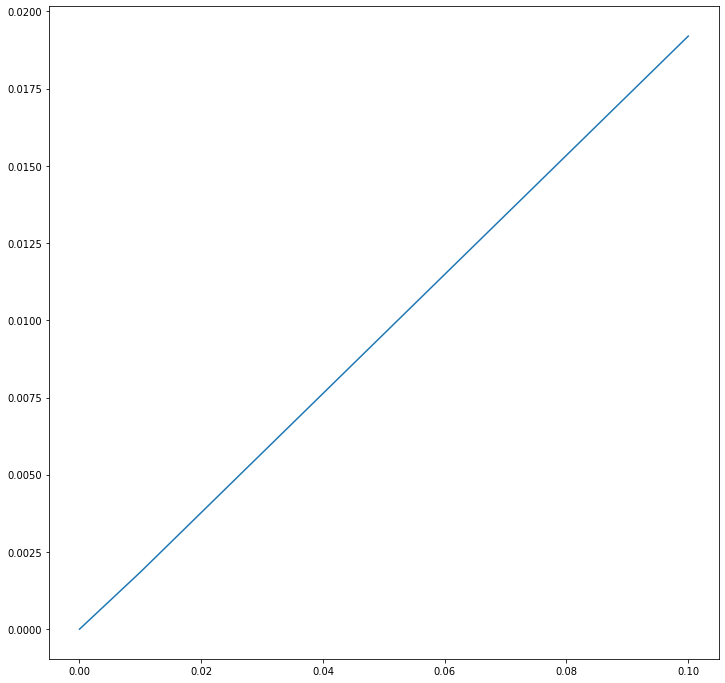

In [47]:
def erreur(X, Y):
    return max(np.abs(X-Y))

l= []

dt_list = [0.1, 0.01, 0.001, 0.0001, 0.00001]

for dt in dt_list: 
    t, x=solve_euler_explicit(f_test, np.array([1.]), dt, 0, 10)
    l.append(erreur(x[:,0], np.exp(-t)))
plt.plot(dt_list, l)
plt.axis = 'equal'
plt.show()

On observe bien une erreur qui tend vers 0 lorsque le pas dt tend vers 0, d'où la convergence du schéma dans ce cas.

De plus, l'erreur est une fonction linéaire du pas dt, ce qui justifie que l'ordre de convergence est 1.

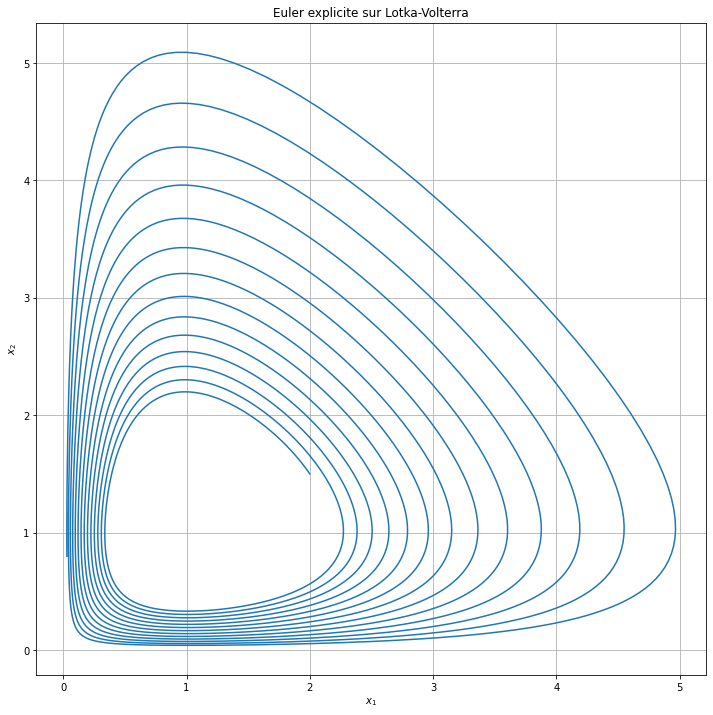

In [48]:
### Question 7 ###

# Euler explicite sur Lotka-Volterra.
time, result = solve_euler_explicit(f, np.array([2., 1.5]), 0.01, 0, 50)
plt.plot(result[:,0], result[:,1], '-', label='Explicite')
#plt.plot(time, result[:,0])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Euler explicite sur Lotka-Volterra')
plt.grid()
plt.show()

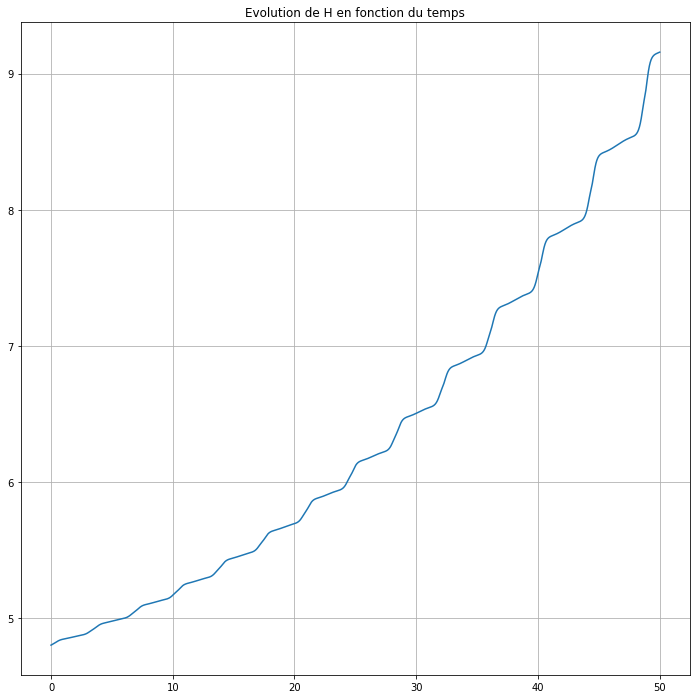

In [49]:
# Evolution de H en fonction du temps.
def H(x1,x2):
    return delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)
    
H_result = H(result[:,0],result[:,1])
plt.plot(time, H_result)
plt.title('Evolution de H en fonction du temps')
plt.grid()
plt.show()

En temps long, on constate que la trajectoire calculée avec Euler explicite diverge. 

De plus, cette résolution n'est pas fidèle à la réalité car H n'est pas une fonction constante du temps le long des solutions.

In [50]:
### Question 8 ###

def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    t = [t0]
    x = [x0]
    ti = t0
    xi = x0
    while ti<tf:
        xsol = xi + dt*f(ti+dt,xi)
        for i in range(0,itermax):
            xsol = xi + dt*f(ti+dt,xsol)
        xi = xsol
        ti = ti + dt
        x.append(xi)
        t.append(ti)
    return np.array(t),np.array(x)

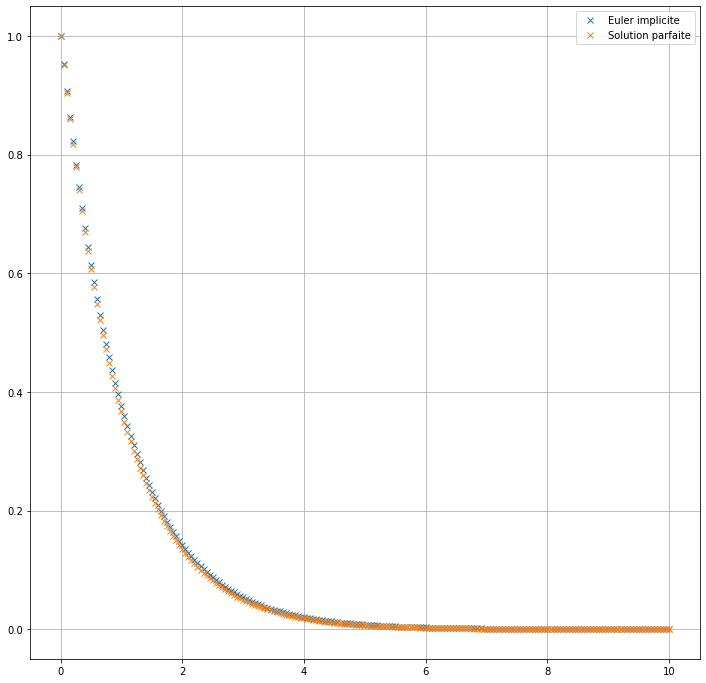

In [51]:
# Test d'Euler implicite sur une solution connue.
time, result = solve_euler_implicit(f_test, np.array([1.]), 0.05, 0, 10)
plt.plot(time, result, 'x', label='Euler implicite')
plt.plot(time, np.exp(-time), 'x', label='Solution parfaite')
plt.legend()
plt.grid()
plt.show()

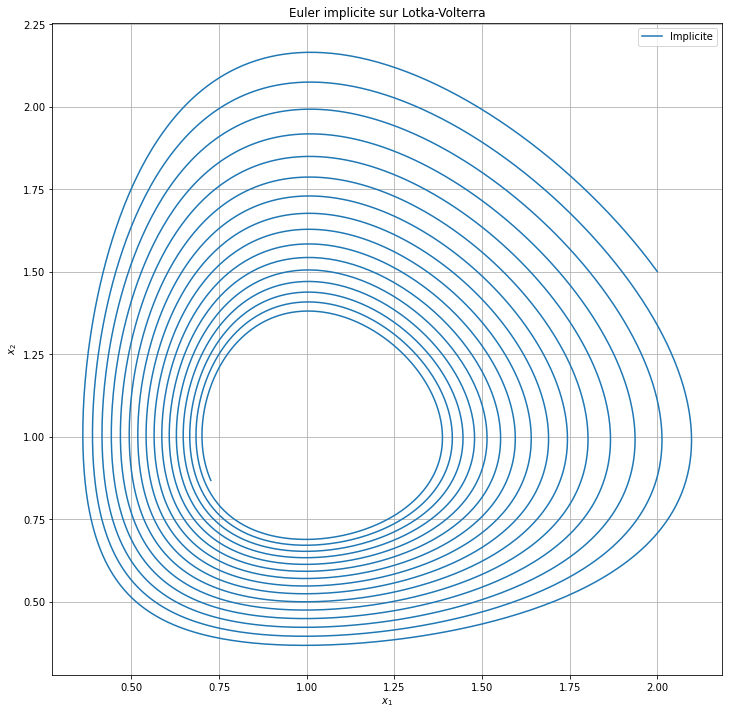

In [52]:
# Euler implicite sur Lotka-Volterra.
time, result = solve_euler_implicit(f, np.array([2.0, 1.5]), 0.01, 0.0, 50.0)
plt.plot(result[:,0], result[:,1], '-', label='Implicite')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Euler implicite sur Lotka-Volterra')
plt.legend()
plt.grid()
plt.show()

Graphiquement, on voit que Euler implicite est nettement plus stable que Euler explicite (les valeurs prises par H à la fin de la simulation divergent moins)

### Question 9 ###

En prenant $u$ continument différentiable, $\dot{X} = g (X) $ avec g continument différentiable donc d'après le théorème de Cauchy, il y a unicité des solutions maximale.
Or en prenant $X$ solution de Lotka-Volterra, et tel que $H(X(0))=H_0$, par constance de H le long de la solution de X, X est solution du système étudié dans cette question, par unicité de la solution maximale, l'ensemble des solutions des 2 systèmes sont égaux.

### Question 10 ###

On dérive : $ \frac{d }{dt} (H(x(t)) - H_0) = (- \delta u_1 + \gamma \frac{u_1}{x_1} -\beta u_2 + \alpha \frac{u_2}{x_2} )( H(x(t)) - H_0) $ 

Donc $ \frac{d }{dt} (H(x(t)) - H_0) = (u_1(\frac{\gamma}{x_1} - \delta) + u_2 (\frac{\alpha}{x_2} - \beta ))(H(x(t)) - H_0)$

En remarquant que $\|\nabla{H(x(t))}\| ^{2} = (\frac{\gamma}{x_1} - \delta)^2 + (\frac{\alpha}{x_2} - \beta )^2$

et en posant $u_1 = - k (\frac{\gamma}{x_1} - \delta)$ et $u_2 = - k(\frac{\alpha}{x_2} - \beta)$

On obtient le résultat.

Or comme $x$ reste à une distance strictement positive de  $\overline{x}$ et que $x$ la trajectoire de $x$ reste à une distance strcitement positive $d$ de $(0,0)$, il existe $m  > 0 $ et $M > 0$ tel que:

 $ 0 < M < \|\nabla{H(x(t))}\| ^{2} < m $ 

 Donc $  -k m  ( H(x(t)) - H_0  ) < \frac{d }{dt} (H(x(t)) - H_0) <-k M  ( H(x(t)) - H_0  )$

 Par intégration et croissance de l'intégrale :

 $0<\exp(-kmt)< H(x(t)) - H_0 < \exp(-kMt)$

 Donc $H(x)$ converge exponentiellement vers $H_0$

### Question 11 ###

Pour assurer la stabilité de $H$, on peut modifier l'implémentation du schéma d'Euler en utilisant le système $ \left \{ \begin{matrix}
\dot{x_1} = x_1 \left ( \alpha - \beta x_2 \right ) - u_1(x_1, x_2) \left ( H(x_1, x_2) - H_0 \right ) \\
\dot{x_2} = - x_2 \left ( \gamma - \delta x_1 \right ) - u_2(x_1, x_2) \left ( H(x_1, x_2) - H_0 \right )
\end{matrix}
\right .$ 

avec $u = k~\nabla{H}$.

Le rôle de $k$ est d'assurer la convergence de $H$ vers $H_0$, et ce, le plus rapidement possible.

$k$ ne peut pas être choisi arbitrairement, car en utilisant la question précédente, on obtient : 
$H(x^{j+1}) - H_0 = \left( 1 - k \left \| \nabla H(x^j) \right \| ^2 dt \right) \left( H(x^j) - H_0 \right)$, ($g(x^{j+1})= g(x^j) + g'(x^j)dt$ au 1er ordre)

Si $k$ est trop grand, alors le terme $\left( 1 - k \left \| \nabla H(x^j) \right \| ^2 dt \right)$ est négatif, ce qui provoque un changement de signe de la différence $H-H_0$ à chaque itération.

Or, on a vu à la question précédente que cette différence est strictement positive, donc $k$ ne peut être arbitrairement grand.